# Testing

This notebook can get you started to test the new `semantique` package!

## Prepare

We will construct all required components for query processing in advance, such that you only have to write the query recipe itself and execute it.

But of course, don't hesitate to create your own mapping instead, try different spatial or temporal extents, or even write your own EO data cube representation..

You can find all documentation notebooks in the file browser in the menu on the left (if you are using Binder).

In [1]:
import semantique as sq

In [2]:
import geopandas as gpd
import json

In [3]:
# Load a mapping.
with open("files/mapping.json", "r") as file:
    mapping = sq.mapping.Semantique(json.load(file))

# Represent an EO data cube.
with open("files/layout.json", "r") as file:
    dc = sq.datacube.GeotiffArchive(json.load(file), src = "files/layers.zip")

# Set the spatio-temporal extent.
space = sq.SpatialExtent(gpd.read_file("files/footprint.geojson"))
time = sq.TemporalExtent("2019-01-01", "2020-12-31")

# Collect the full context.
# Including additional configuration parameters.
context = {
    "datacube": dc, 
    "mapping": mapping,
    "space": space,
    "time": time,
    "crs": 3035, 
    "tz": "UTC", 
    "spatial_resolution": [-10, 10]
}

Some notes:

- The EO data cube contains only a limited set of resources, which are the red, green, blue and nir bands from Sentinel 2 and the semantic enrichment layers colortype (i.e. the SIAM color indices), greenness and brightness.
- The EO data cube only has a limited spatial extent, equal to [footprint.geojson](https://github.com/ZGIS/semantique/blob/main/demo/files/footprint.geojson).
- The EO data cube only has a limited amount of timestamps: 2019-12-15, 2020-09-05 and 2020-12-19,
- The mapping contains rulesets for five entities: water, vegetation, builtup, cloud and snow.

## A small example

As a small example we will create a query recipe with a single result: the infamous water count map!

In [4]:
recipe = sq.QueryRecipe()

In [5]:
recipe["map"] = sq.entity("water").reduce("count", "time")

In [6]:
response = recipe.execute(**context)

In [7]:
response["map"]

<xarray.DataArray 'map' (y: 563, x: 576)>
array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * x              (x) float64 4.53e+06 4.53e+06 ... 4.536e+06 4.536e+06
  * y              (y) float64 2.697e+06 2.697e+06 ... 2.691e+06 2.691e+06
    spatial_ref    int64 0
    temporal_ref   int64 0
    spatial_feats  (y, x) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
Attributes:
    value_type:  discrete

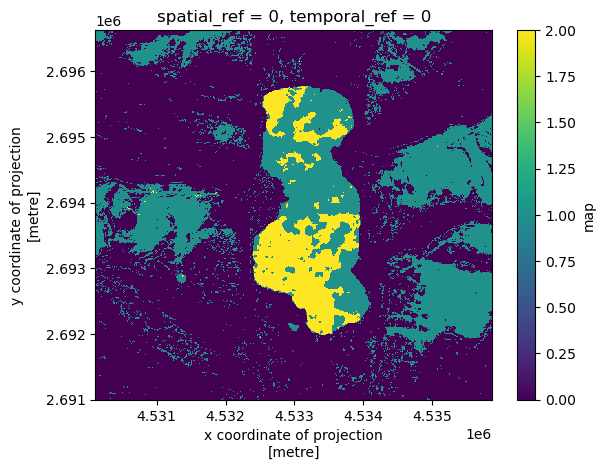

In [8]:
response["map"].plot()

## Your turn!

Happy coding :)